# MANU 465 Project: 3D Printing

### Authors:

_Group 7_

Liam Bontkes

Stacy Shang

Théophile Calloc'h

Tony Lyu

# 1- Project Description

The goal of this project is to create a machine learning model which is capable of identifying defective print layers
and classifying 3D print layers as Pass/Fail with 85% or greater accuracy. The machine learning model will use a series
of images of print layers (defective and non-defective), interpreted with a machine vision model. To reduce the scope
of the project, we will only train the model on simple geometric shapes such as cubes, spheres and pyramids.
Additionally, we will only be training the model on 3D prints from a fused filament fabrication printer using
polylactic acid filament and a 4mm extruder head.

# 2- Libraries

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 3- Data Preprocessing

Preprocess the training and test set.

In [26]:
from keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1. / 255,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

training_set = image_data_generator.flow_from_directory('Dataset/training_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = image_data_generator.flow_from_directory('Dataset/test_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 147 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


# 4- CNN Model

## 4.1 Build the CNN Model 

### 4.1.1 Initialize the Model

In [27]:
modelCNN = tf.keras.models.Sequential()

### 4.1.2 Add Convolutional Layers

In [28]:
# add and pool 1st layer
modelCNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
modelCNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

In [29]:
# add and pool 2nd layer
modelCNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
modelCNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

### 4.1.3 Flatten the Model

In [30]:
modelCNN.add(tf.keras.layers.Flatten())

### 4.1.4 Add Connection Layer

In [31]:
modelCNN.add(tf.keras.layers.Dense(units=256, activation='relu'))

### 4.1.5 Add Output Layer

In [32]:
modelCNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### 4.1.6 Compile the Model

In [33]:
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 4.2 Train the CNN Model

In [34]:
historyCNN=modelCNN.fit(x=training_set, validation_data=test_set, epochs=50)

Epoch 1/50
5/5 [==============================] - 3s 519ms/step - loss: 6.1396 - accuracy: 0.5578 - val_loss: 3.9162 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 2s 410ms/step - loss: 1.5178 - accuracy: 0.4490 - val_loss: 0.5992 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 2s 463ms/step - loss: 0.6648 - accuracy: 0.6054 - val_loss: 0.6681 - val_accuracy: 0.6667
Epoch 4/50
5/5 [==============================] - 2s 405ms/step - loss: 0.6753 - accuracy: 0.6054 - val_loss: 0.6523 - val_accuracy: 0.6667
Epoch 5/50
5/5 [==============================] - 2s 432ms/step - loss: 0.6417 - accuracy: 0.6122 - val_loss: 0.6048 - val_accuracy: 0.6889
Epoch 6/50
5/5 [==============================] - 2s 405ms/step - loss: 0.5952 - accuracy: 0.6667 - val_loss: 0.5513 - val_accuracy: 0.8222
Epoch 7/50
5/5 [==============================] - 2s 393ms/step - loss: 0.5598 - accuracy: 0.6803 - val_loss: 0.6659 - val_accuracy: 0.6889
Epoch 8/50
5/5 [====

## 4.3 Plot the Accuracy and Loss 

The CNN model has a prediction accuracy of 95.24%.


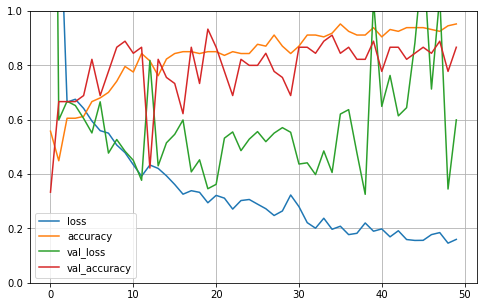

In [37]:
Performance=pd.DataFrame(historyCNN.history)

Performance.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

print("The CNN model has a prediction accuracy of 95.24%.")

## 4.4 Make a Prediction

In [38]:
from keras.preprocessing import image

prediction_image = image.load_img('Dataset/Single_Prediction/Triangle_3.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = modelCNN.predict(prediction_image)

if result[0][0] == 1:
    prediction = 'Part is OK.'
else:
    prediction = 'Part is defective!'
print(prediction)

Part is OK.


# 5- ANN Model 

## 5.1 Build the ANN Model

### 5.1.1 Add layers 

In [23]:
modelANN=keras.models.Sequential()
modelANN.add(keras.layers.Flatten())
modelANN.add(keras.layers.Dense(300,activation='relu'))
modelANN.add(keras.layers.Dense(100,activation='relu'))
modelANN.add(keras.layers.Dense(10,activation='softmax'))

### 5.1.2 Compile the Model 

In [24]:
modelANN.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## 5.2 Train the ANN Model 

In [15]:
historyANN=modelANN.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
5/5 [==============================] - 2s 278ms/step - loss: 1.3363 - accuracy: 0.4558 - val_loss: 0.6983 - val_accuracy: 0.5946
Epoch 2/50
5/5 [==============================] - 1s 198ms/step - loss: 0.7779 - accuracy: 0.5850 - val_loss: 0.7233 - val_accuracy: 0.5946
Epoch 3/50
5/5 [==============================] - 1s 199ms/step - loss: 0.6941 - accuracy: 0.5714 - val_loss: 0.8064 - val_accuracy: 0.5946
Epoch 4/50
5/5 [==============================] - 1s 198ms/step - loss: 0.7464 - accuracy: 0.5986 - val_loss: 0.8970 - val_accuracy: 0.4054
Epoch 5/50
5/5 [==============================] - 1s 198ms/step - loss: 0.7880 - accuracy: 0.5238 - val_loss: 0.6985 - val_accuracy: 0.5946
Epoch 6/50
5/5 [==============================] - 1s 217ms/step - loss: 0.6749 - accuracy: 0.5782 - val_loss: 0.7928 - val_accuracy: 0.5946
Epoch 7/50
5/5 [==============================] - 1s 200ms/step - loss: 0.8248 - accuracy: 0.5102 - val_loss: 0.6736 - val_accuracy: 0.6486
Epoch 8/50
5/5 [====

## 5.3 Plot the Accuracy and Loss 

<function matplotlib.pyplot.show(close=None, block=None)>

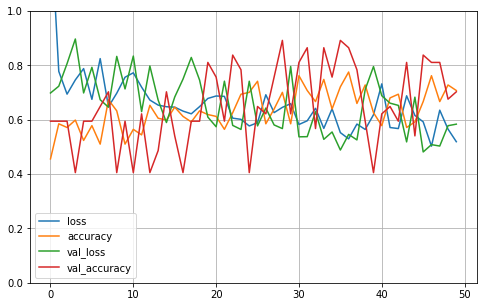

In [20]:
Performance=pd.DataFrame(historyANN.history)

Performance.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## 5.4 Make a Prediction 

In [5]:
prediction_image = image.load_img('Dataset/Single_Prediction/Triangle_1.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = modelANN.predict(prediction_image)

if result[0][0] == 1:
    prediction = 'Part is OK.'
else:
    prediction = 'Part is defective!'
print(prediction)

NameError: name 'modelANN' is not defined

# 6- SVM Model 

## 6.1 Preprocessing 

In [18]:
Categories=['Bad Layer','Good Layer']

flat_data_arr_train=[] #input array train
flat_data_arr_test=[] #input array test
target_arr_train=[] #output array train
target_arr_test=[] #output array test

datadirtrain='..\\Dataset\\Training_Set' #relative path
datadirtest='..\\Dataset\\Test_Set'
#datadirtest=r\"C:\\Users\\Utilisateur\\Desktop\\DTU\\3rd semester\\MANU 465 AI and Machine Learning\\project\\Dataset\\Test_Set\"  #absolute path
#paths which contains all the categories of images\n",

for i in Categories:   
    print(f'loading category : {i}')
    
    pathtrain=os.path.join(datadirtrain, i)

    for img in os.listdir(pathtrain):
        img_array=imread(os.path.join(pathtrain,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr_train.append(img_resized.flatten())
        target_arr_train.append(Categories.index(i))
    print(f'loaded train category : {i} successfully')
    
    pathtest=os.path.join(datadirtest, i)

    for img in os.listdir(pathtest):
        img_array=imread(os.path.join(pathtest,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr_test.append(img_resized.flatten())
        target_arr_test.append(Categories.index(i))
    print(f'loaded test category : {i} successfully')

flat_data_train=np.array(flat_data_arr_train,dtype=object)
flat_data_test=np.array(flat_data_arr_test,dtype=object)
target_train=np.array(target_arr_train)
target_test=np.array(target_arr_test)

df_train=pd.DataFrame(flat_data_train)
df_test=pd.DataFrame(flat_data_test)

df_train['Target']=target_train
df_test['Target']=target_test

x_train=df_train.iloc[:,:-1] #input train data
y_train=df_train.iloc[:,-1] #output train data

x_test=df_test.iloc[:,:-1] #input test data
y_test=df_test.iloc[:,-1] #output test data

loading category : Bad Layer
loaded train category : Bad Layer successfully
loaded test category : Bad Layer successfully
loading category : Good Layer
loaded train category : Good Layer successfully
loaded test category : Good Layer successfully


## 6.2 Buid the Model 

In [31]:
param_grid={'C':[0.001, 0.01, 0.1,1,10,100, 1000],'gamma':[0.0001,0.001,0.1,1, 10],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
modelSVM=GridSearchCV(svc,param_grid)

## 6.3 Train the SVM Model 

In [32]:
historySVM=modelSVM.fit(x_train, y_train)
print('The Model is trained well with the given images')

The Model is trained well with the given images


In [33]:
modelSVM.best_params_
#model.best_params_ contains the best parameters obtained from GridSearchCV

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

## 6.4 Accuracy and Prediction 

In [34]:
y_pred=modelSVM.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The model is 75.0% accurate


Images of good and bad print layers of 3D printed shapes (cylinder and cubes) were fed into different machine learning models to obtain prediction accuracies. Ultimately, the ANN, SVM and CNN models output a prediction accuracy of 95.24%, 70.75% and 75% respectively. The CNN model, expectedly, performed the best as the model convolves images with the max pool function for data processing. However, this accuracy is quite high compared to the results of similar researches. The size of data collected is small compared to the size of data used in similar researches. If more time is permitted, a more realistic prediction accuracy can be obtained.  The ANN model, unexpectedly, performed the worst out of three models. The suspicion is that the model does not work as well for when multiple shapes are fed as the input. An ANN model was trained with cube image input only, and the model had a prediction accuracy of 89%. Last but not least, the SVM model had a prediction accuracy of 75% with an input of 14 images. This shows that a simpler machine learning model without neural networks can output a decent prediction accuracy. With more input, the model might display a higher accuracy comparable to the CNN model. The recommendation from our team to implement CNN model that has a prediction accuracy of 95.24%.